<a href="https://colab.research.google.com/github/fathima-rizwana/XYZ_Ads_Airing_Analysis/blob/main/XYZ_Ads_Airing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
xyz_df=pd.read_csv('drive/My Drive/XYZ_Ads_Airing_Project/XYZ_Ads_Airings_Data.csv')

In [ ]:
xyz_df.head()

,Id,Brand,Product,Network,Network Type,Show,Date,Time,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Year,Broadcast Month,Broadcast Week,Day Of Week,Hour Of Day,TimeZone
0,1000001,Honda Cars,Honda Jazz,N-10079,cable,S-16736,01/10/2021,10:19:08 PM,1,PRIME TIME,30,1.0,178,2021,JAN,2,7,22,Northeast India
1,1000002,Maruti Suzuki,Maruti Suzuki Baleno,N-10096,cable,S-17450,01/16/2021,7:28:13 PM,3,WEEKEND,30,1.0,514,2021,JAN,3,6,19,Northeast India
2,1000003,Maruti Suzuki,Maruti Suzuki Ciaz,N-10044,cable,S-12299,01/05/2021,1:09:26 PM,2,DAYTIME,30,1.0,2313,2021,JAN,2,2,13,Northeast India
3,1000004,Maruti Suzuki,Maruti Suzuki Ciaz,N-10060,cable,S-14354,01/06/2021,8:55:49 AM,1,EARLY MORNING,30,1.0,308,2021,JAN,2,3,8,Northeast India
4,1000005,Hyundai Motors India,Hyundai I20,N-10123,cable,S-15146,01/02/2021,11:07:43 PM,2,LATE FRINGE,30,1.0,1885,2021,JAN,1,6,23,Northeast India


In [ ]:
xyz_df.shape

(731784, 19)

**What is Pod Position? Does the Pod position number affect the amount spent on Ads for a specific period of time by a company? (Explain in Details with examples from the dataset provided)**

In [ ]:
spend_pod_position_brand=xyz_df.groupby(["Brand","Pod Position"]).sum()['Spend ($)']
spend_pod_position_brand

Brand       Pod Position
Honda Cars  1               7454554
            2               7155792
            3               6667803
            4               6096237
            5               4450668
                             ...   
Toyota      23                17390
            24                  868
            25                 2186
            26                 1021
            27                  947
Name: Spend ($), Length: 172, dtype: int64

<Figure size 1440x720 with 0 Axes>

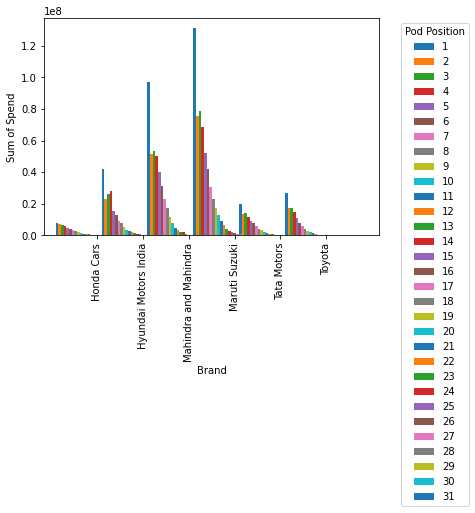

In [ ]:
plt.figure(figsize=([20,10]))
spend_pod_position_brand.unstack().plot.bar(width=1.8)
plt.xlabel("Brand")
plt.ylabel("Sum of Spend")
plt.legend(title="Pod Position",loc='upper left',bbox_to_anchor=(1.05,1.0))
plt.show()

**Insights:** <br>
From the above graph we can see that lesser the pod position higher is the amount spent by the company for airing.
Therefore we can conclude that pod position affects the amount spent on ads for a specific period of time by the company.

**What is the share of various brands in TV airings and how has it changed from Q1 to Q4 in 2021?**

In [ ]:
#Creating the column Quarter
conditions=[(xyz_df['Broadcast Month']=="JAN") | (xyz_df['Broadcast Month']=="FEB") | (xyz_df['Broadcast Month']=="MAR"),
            (xyz_df['Broadcast Month']=="APR") | (xyz_df['Broadcast Month']=="MAY") | (xyz_df['Broadcast Month']=="JUN"),
            (xyz_df['Broadcast Month']=="JUL") | (xyz_df['Broadcast Month']=="AUG") | (xyz_df['Broadcast Month']=="SEP"),
            (xyz_df['Broadcast Month']=="OCT") | (xyz_df['Broadcast Month']=="NOV") | (xyz_df['Broadcast Month']=="DEC")
            ]
results=["Q1","Q2","Q3","Q4"]

xyz_df['Quarter']=np.select(conditions,results)

In [ ]:
xyz_df.head()

,Id,Brand,Product,Network,Network Type,Show,Date,Time,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Year,Broadcast Month,Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Quarter
0,1000001,Honda Cars,Honda Jazz,N-10079,cable,S-16736,01/10/2021,10:19:08 PM,1,PRIME TIME,30,1.0,178,2021,JAN,2,7,22,Northeast India,Q1
1,1000002,Maruti Suzuki,Maruti Suzuki Baleno,N-10096,cable,S-17450,01/16/2021,7:28:13 PM,3,WEEKEND,30,1.0,514,2021,JAN,3,6,19,Northeast India,Q1
2,1000003,Maruti Suzuki,Maruti Suzuki Ciaz,N-10044,cable,S-12299,01/05/2021,1:09:26 PM,2,DAYTIME,30,1.0,2313,2021,JAN,2,2,13,Northeast India,Q1
3,1000004,Maruti Suzuki,Maruti Suzuki Ciaz,N-10060,cable,S-14354,01/06/2021,8:55:49 AM,1,EARLY MORNING,30,1.0,308,2021,JAN,2,3,8,Northeast India,Q1
4,1000005,Hyundai Motors India,Hyundai I20,N-10123,cable,S-15146,01/02/2021,11:07:43 PM,2,LATE FRINGE,30,1.0,1885,2021,JAN,1,6,23,Northeast India,Q1


In [ ]:
quarterly_share=xyz_df.groupby(["Brand","Quarter"]).Id.count()*100/731784

In [ ]:
quarterly_share

Brand                  Quarter
Honda Cars             Q1          3.667612
                       Q2          2.562368
                       Q3          3.204498
                       Q4          2.217184
Hyundai Motors India   Q1          3.088343
                       Q2          2.580953
                       Q3          2.260640
                       Q4          1.812830
Mahindra and Mahindra  Q1          5.810731
                       Q2          6.297487
                       Q3          5.437124
                       Q4          2.664174
Maruti Suzuki          Q1         11.430695
                       Q2          9.788681
                       Q3          9.012359
                       Q4          8.068364
Tata Motors            Q1          2.983941
                       Q2          1.999634
                       Q3          1.981322
                       Q4          4.109546
Toyota                 Q1          2.494042
                       Q2          3.003755
 

<Figure size 1440x720 with 0 Axes>

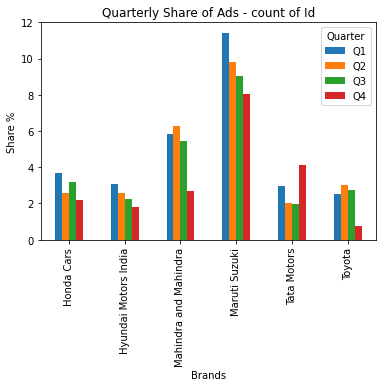

In [ ]:
plt.figure(figsize=([20,10]))
quarterly_share.unstack().plot.bar()
plt.title("Quarterly Share of Ads - count of Id")
plt.xlabel("Brands")
plt.ylabel("Share %")
plt.legend(title="Quarter",loc="upper right")
plt.show()

**Insights:**<br>
- Maruti Suzuki has the highest number of ads and so the share.
- The count of ads has decreased drastically in Q4 for Mahindra and Mahindra and Toyota.
- For Tata Motors the number of ads has increased in Q4.


In [ ]:
quarterly_amt_spent=xyz_df.groupby(["Brand","Quarter"]).sum()['Spend ($)']

In [ ]:
quarterly_amt_spent

Brand                  Quarter
Honda Cars             Q1          17641924
                       Q2           9172658
                       Q3          12346531
                       Q4           9097227
Hyundai Motors India   Q1          63300421
                       Q2          40636071
                       Q3          39735684
                       Q4          37136580
Mahindra and Mahindra  Q1         128387916
                       Q2         100185793
                       Q3          95530787
                       Q4          73201159
Maruti Suzuki          Q1         187686495
                       Q2         129020356
                       Q3         125130088
                       Q4         116809533
Tata Motors            Q1          27525724
                       Q2          16268034
                       Q3          14931630
                       Q4          36064839
Toyota                 Q1          40137985
                       Q2          29617351
 

<Figure size 1440x720 with 0 Axes>

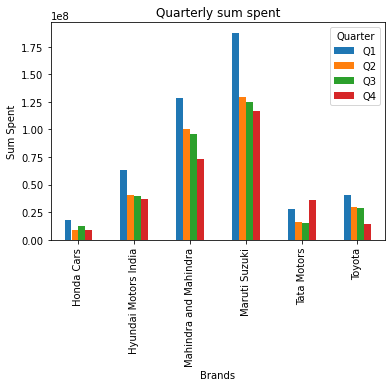

In [ ]:
plt.figure(figsize=([20,10]))
quarterly_amt_spent.unstack().plot.bar()
plt.title("Quarterly sum spent")
plt.xlabel("Brands")
plt.ylabel("Sum Spent")
plt.legend(title="Quarter",loc="upper right")
plt.show()

**Insights:**<br>
- Maruti Suzuki has spent the highest for ads airings followed by Mahindra and Mahindra.
- Honda Cars has spent the least amount for ads airings.
- The amount spent by Tata motors has slightly decreased in Q2 and Q3, but has increased in Q4.
- Mahindra and Mahindra, Maruti Suzuki, Hyundai and Toyota have spent the highest in Q1 which slightly decreases for the rest of the year.




**Conduct a competitive analysis for the brands and define advertisement strategy of different brands and how it differs across the brands.**

In [ ]:
Dayparts_amt_spent=xyz_df.groupby(["Brand","Dayparts"]).sum()['Spend ($)']

In [ ]:
Dayparts_amt_spent

Brand                  Dayparts     
Honda Cars             DAYTIME           15106799
                       EARLY FRINGE       5763471
                       EARLY MORNING      5190376
                       EVENING NEWS       2105762
                       LATE FRINGE        3421197
                       OVERNIGHT          2820096
                       PRIME ACCESS       1352961
                       PRIME TIME         7002902
                       WEEKEND            5494776
Hyundai Motors India   DAYTIME           12360920
                       EARLY FRINGE       7156835
                       EARLY MORNING      8708318
                       EVENING NEWS       5364194
                       LATE FRINGE       13648569
                       OVERNIGHT          3181379
                       PRIME ACCESS       7711727
                       PRIME TIME        86737738
                       WEEKEND           35939076
Mahindra and Mahindra  DAYTIME           64154402
             

<Figure size 1440x720 with 0 Axes>

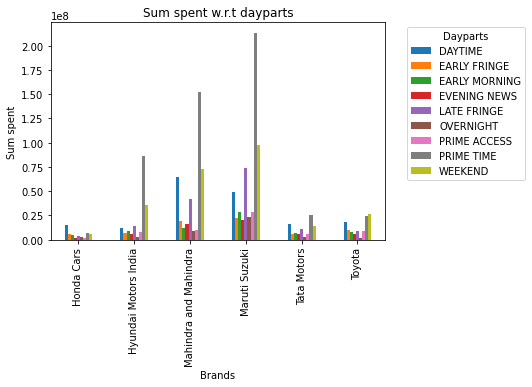

In [ ]:
plt.figure(figsize=([20,10]))
Dayparts_amt_spent.unstack().plot.bar()
plt.title("Sum spent w.r.t dayparts")
plt.xlabel("Brands")
plt.ylabel("Sum spent")
plt.legend(title="Dayparts",loc="upper left",bbox_to_anchor=(1.05,1.0))
plt.show()

**Insights:**<br>
- Honda Cars has spent most on daytime.
- Hyundai, Mahindra and Mahindra, Maruti Suzuki and Tata motors have spent most of their money for Prime time with Maruti Suzuki being the highest.
- Toyota has spent most of its money for airing the ads on weekend followed by Primetime.

In [ ]:
Dayparts_cnt_spent=xyz_df.groupby(["Brand","Dayparts"]).count()['Id']

In [ ]:
Dayparts_cnt_spent

Brand                  Dayparts     
Honda Cars             DAYTIME          28031
                       EARLY FRINGE      7056
                       EARLY MORNING    14877
                       EVENING NEWS      3067
                       LATE FRINGE       6168
                       OVERNIGHT         5714
                       PRIME ACCESS      1903
                       PRIME TIME        8391
                       WEEKEND          10058
Hyundai Motors India   DAYTIME          12485
                       EARLY FRINGE      4367
                       EARLY MORNING     8153
                       EVENING NEWS      2411
                       LATE FRINGE      10214
                       OVERNIGHT         6621
                       PRIME ACCESS      2970
                       PRIME TIME       13508
                       WEEKEND          10567
Mahindra and Mahindra  DAYTIME          33552
                       EARLY FRINGE      9335
                       EARLY MORNING    139

<Figure size 1440x720 with 0 Axes>

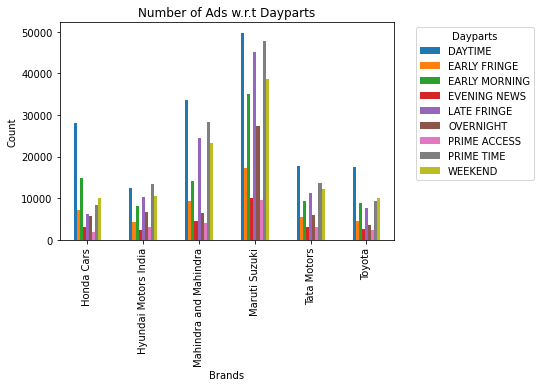

In [ ]:
plt.figure(figsize=([20,10]))
Dayparts_cnt_spent.unstack().plot.bar()
plt.title("Number of Ads w.r.t Dayparts")
plt.ylabel("Count")
plt.xlabel("Brands")
plt.legend(title="Dayparts",loc="upper left",bbox_to_anchor=(1.05,1.0))
plt.show()

**Insights:**<br>
- Maruti Suzuki has broadcasted most of its ads in daytime followed by prime time.
- Next highest number of ads has been played by Mahindra and Mahindra at daytime followed by prime time.
- Almost all the brands have broadcasted the most number of ads at daytime.
- Hyundai has telecasted almost similar number of ads at Prime time and daytime.

**Conclusion:**<br>
Almost all the brands spend most for airing the ads at Prime time and weekend as this is the time when large number of audience are most likely to watch TV. And they also seem to air most number of ads at daytime.

**Mahindra and Mahindra wants to run a digital ad campaign to complement its existing TV ads in Q1 of 2022. Based on the data from 2021, suggest a media plan to the CMO of Mahindra and Mahindra. Which audience should they target? Assume XYZ Ads has the ad viewership data and TV viewership for the people in India.**

In [ ]:
avg_duration_brands=xyz_df.groupby(["Brand"]).mean()['Duration']

In [ ]:
avg_duration_brands

Brand
Honda Cars               24.720812
Hyundai Motors India     23.766130
Mahindra and Mahindra    29.621678
Maruti Suzuki            29.635500
Tata Motors              16.382819
Toyota                   26.818671
Name: Duration, dtype: float64

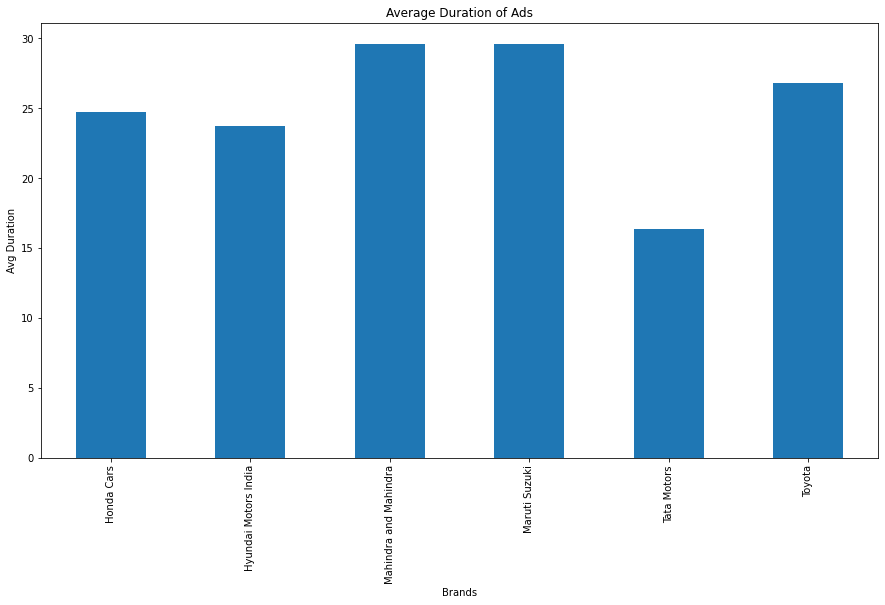

In [ ]:
plt.figure(figsize=([15,8]))
avg_duration_brands.plot.bar()
plt.title("Average Duration of Ads")
plt.ylabel("Avg Duration")
plt.xlabel("Brands")
plt.show()

**Insights:**<br>
Mahindra and Mahindra and Maruti suzuki have the highest duration of ads.

**Insights:**<br>

In [ ]:
brand_spend_timezone=xyz_df.groupby(["Brand","TimeZone"]).mean()['Spend ($)']

In [ ]:
brand_spend_timezone

Brand                  TimeZone       
Honda Cars             Central India        361.910256
                       Northeast India      561.408237
                       Northern India       209.000000
                       Southern India       787.720021
Hyundai Motors India   Central India       5585.716981
                       Northeast India     2341.558241
                       Northern India     17115.230769
                       Southern India      9618.737832
Mahindra and Mahindra  Central India       4641.268293
                       Northeast India     2587.832472
                       Northern India      5477.857143
                       Southern India      7796.646057
Maruti Suzuki          Central India       1395.665653
                       Northeast India     1890.129060
                       Northern India      9638.902439
                       Southern India      5052.030401
Tata Motors            Central India        446.045307
                       Nor

<Figure size 1440x720 with 0 Axes>

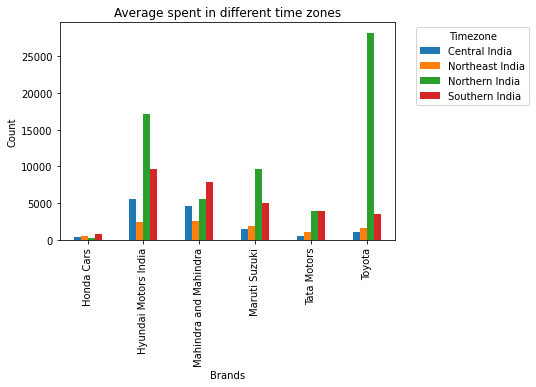

In [ ]:
plt.figure(figsize=([20,10]))
brand_spend_timezone.unstack().plot.bar()
plt.title("Average spent in different time zones")
plt.ylabel("Count")
plt.xlabel("Brands")
plt.legend(title="Timezone",loc="upper left",bbox_to_anchor=(1.05,1.0))
plt.show()

**Insights:**<br>
- Majority of the brands have focused more on northern India.
- Toyota tops the list by spending the most on the northern part.
- Mahindra and Mahindra has spent the most on Southern part followed by the northern part of India.


In [ ]:
mahindra_Q1=xyz_df.loc[(xyz_df['Brand']=="Mahindra and Mahindra") & (xyz_df['Quarter']=="Q1")]

In [ ]:
mahindra_Q1

,Id,Brand,Product,Network,Network Type,Show,Date,Time,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Year,Broadcast Month,Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Quarter
23,1000024,Mahindra and Mahindra,Mahindra XUV 700,N-10103,cable,S-22277,01/01/2021,4:28:54 PM,1,EARLY FRINGE,20,0.67,417,2021,JAN,1,5,16,Northeast India,Q1
24,1000025,Mahindra and Mahindra,Mahindra New Thar,N-10016,cable,S-16132,01/13/2021,12:15:52 PM,2,DAYTIME,30,1.00,116,2021,JAN,3,3,12,Northeast India,Q1
25,1000026,Mahindra and Mahindra,Mahindra XUV 700,N-10010,cable,S-22198,01/02/2021,6:52:36 AM,6,EARLY MORNING,20,0.67,151,2021,JAN,1,6,6,Northeast India,Q1
30,1000031,Mahindra and Mahindra,Mahindra New Thar,N-10058,cable,S-19523,01/02/2021,4:53:16 PM,4,WEEKEND,30,1.00,780,2021,JAN,1,6,16,Northeast India,Q1
39,1000040,Mahindra and Mahindra,Mahindra New Thar,N-10099,cable,S-17876,01/16/2021,11:21:57 AM,7,WEEKEND,30,1.00,1362,2021,JAN,3,6,11,Northeast India,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731652,1731653,Mahindra and Mahindra,Mahindra New Thar,N-10109,cable,S-13515,12/29/2021,7:31:35 PM,2,PRIME ACCESS,30,1.00,635,2022,JAN,1,3,19,Northeast India,Q1
731705,1731706,Mahindra and Mahindra,Mahindra New Thar,N-10023,cable,S-10943,12/29/2021,10:35:07 PM,4,PRIME TIME,30,1.00,2536,2022,JAN,1,3,22,Northeast India,Q1
731759,1731760,Mahindra and Mahindra,Mahindra New Thar,N-10092,cable,S-18149,12/30/2021,3:13:47 PM,3,DAYTIME,30,1.00,2084,2022,JAN,1,4,15,Northeast India,Q1
731766,1731767,Mahindra and Mahindra,Mahindra New Thar,N-10038,cable,S-12191,12/31/2021,1:16:12 PM,4,DAYTIME,30,1.00,42693,2022,JAN,1,5,13,Southern India,Q1


In [ ]:
Mahindra_Q1_Spend=mahindra_Q1.groupby(["Dayparts"]).count()['Spend ($)']

In [ ]:
Mahindra_Q1_Spend

Dayparts
DAYTIME          8788
EARLY FRINGE     2527
EARLY MORNING    3520
EVENING NEWS     1352
LATE FRINGE      6885
OVERNIGHT        1780
PRIME ACCESS     1319
PRIME TIME       9380
WEEKEND          6971
Name: Spend ($), dtype: int64

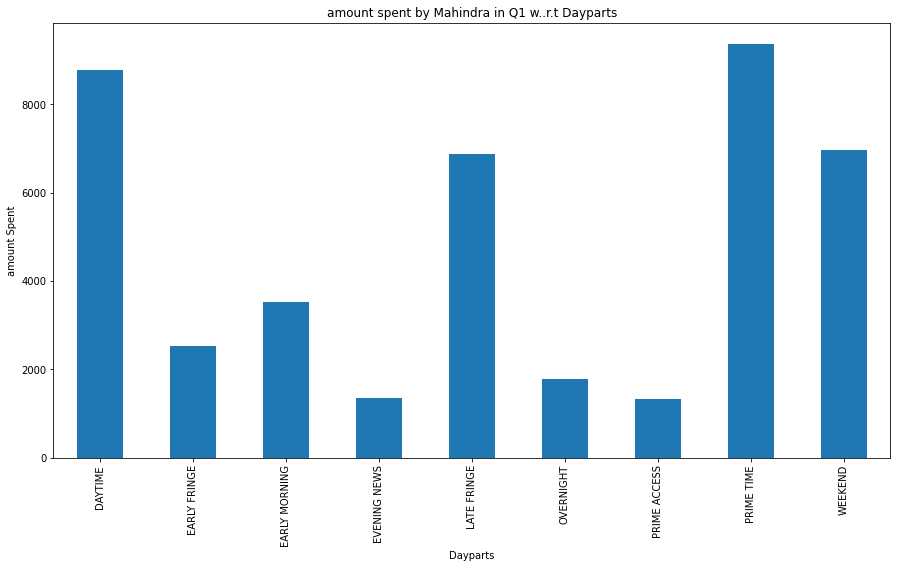

In [ ]:
plt.figure(figsize=([15,8]))
Mahindra_Q1_Spend.plot.bar()
plt.title("amount spent by Mahindra in Q1 w..r.t Dayparts")
plt.ylabel("amount Spent")
plt.xlabel("Dayparts")
plt.show()

**Insights:**<br>
Mahindra and Mahindra has aired the most number of ads at prime time followed by daytime and then weekend.

In [ ]:
Mahindra_Q1_Spend

Dayparts
DAYTIME          8788
EARLY FRINGE     2527
EARLY MORNING    3520
EVENING NEWS     1352
LATE FRINGE      6885
OVERNIGHT        1780
PRIME ACCESS     1319
PRIME TIME       9380
WEEKEND          6971
Name: Spend ($), dtype: int64

In [ ]:
Mahindra_Q1_Dayparts_Spend=mahindra_Q1.groupby(["Dayparts","Day Of Week"]).sum()['Spend ($)']

In [ ]:
Mahindra_Q1_Dayparts_Spend

Dayparts       Day Of Week
DAYTIME        1               3849998
               2               3902361
               3               3554893
               4               3964858
               5               4153270
EARLY FRINGE   1               1789293
               2               1743795
               3               1004199
               4               1677747
               5               1376632
EARLY MORNING  1                503418
               2                381715
               3                348503
               4                366964
               5                468123
               6                645014
               7                633131
EVENING NEWS   1               1176631
               2               1437935
               3                785752
               4               1031453
               5               1171314
LATE FRINGE    1               1855301
               2               1854094
               3               179924

<Figure size 1440x720 with 0 Axes>

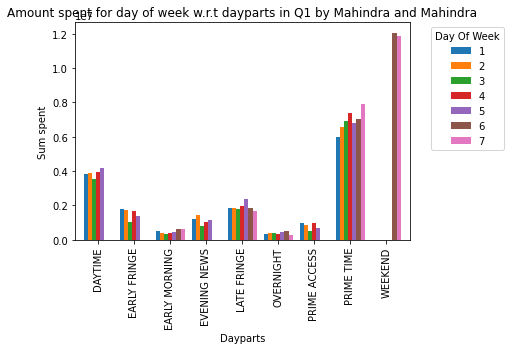

In [ ]:
plt.figure(figsize=([20,10]))
Mahindra_Q1_Dayparts_Spend.unstack().plot.bar(width=0.8)
plt.title("Amount spent for day of week w.r.t dayparts in Q1 by Mahindra and Mahindra")
plt.ylabel("Sum spent")
plt.xlabel("Dayparts")
plt.legend(title="Day Of Week",loc="upper left",bbox_to_anchor=(1.05,1.0))
plt.show()

**Insights:**<br>
- Mahindra and Mahindra has spent most of its expenditure on weekend and prime time on days 6 and 7.
- Mahindra and Mahindra has also spent a considerable amount of its expenditure on all days of the week at Prime time.

**Conclusion:**<br>
- Mahindra and Mahindra should focus on all time zones to register their brand all over India especially the northern part like other brands to be able to compete with the other brands at the northern part.
- Mahindra and Mahindra should consider spending more on Overnight slots on the weekend as many people tend to watch TV on the weekend nights.

